## Orange Disease Detection

This exercise is from a Kaggle challenge https://www.kaggle.com/datasets/jonathansilva2020/orange-diseases-dataset on an Orange disease dataset.

In [3]:
from torch import nn
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
import torch

In [2]:
data_dir = "dataset"

train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data=datasets.ImageFolder(data_dir+'/train', transform=train_transform)
test_data=datasets.ImageFolder(data_dir+'/test', transform=test_transform)

trainloader=torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader=torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

## Visualize the images

In [24]:
disease = {0: 'blackspot', 1:'canker', 2:'fresh', 3:'grenning'}

In [25]:
disease.get(0)

'blackspot'

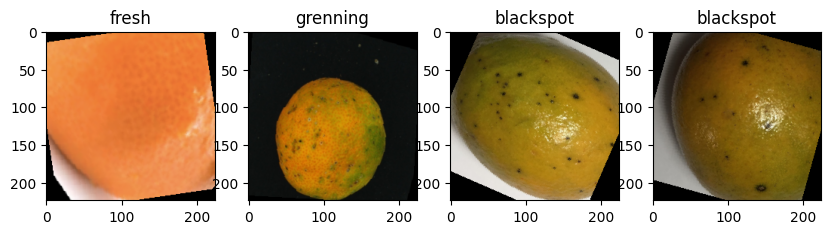

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(trainloader))

fig, axes=plt.subplots(figsize=(10,4), ncols=4)
for idx in np.arange(4):
    ax = axes[idx]
    image=images[idx].numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    ax.imshow(image)
    ax.set_title(disease.get(labels[idx].item()))

In [41]:
classes = train_data.class_to_idx

{'blackspot': 0, 'canker': 1, 'fresh': 2, 'grenning': 3}

## Design Model

In [30]:
from torchvision import models
from torch import optim
import torch.nn.functional as F

model = models.resnet50(pretrained=True)
model

c:\Users\bimam\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bimam\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
classifier = nn.Sequential(nn.Linear(2048, 1024),
                            nn.ReLU(),
                            nn.Linear(1024, 512),
                            nn.ReLU(),
                            nn.Dropout(p=0.2),
                            nn.Linear(512, 4),
                            nn.LogSoftmax(dim=1))

classifier

Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=512, out_features=4, bias=True)
  (6): LogSoftmax(dim=1)
)

In [33]:
model.fc= classifier
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
criterion= nn.NLLLoss()
optimizer=optim.Adam(model.fc.parameters(), lr=0.003)

## Train the model

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [39]:
model.to(device)
epochs = 5
step=1
print_every=10


for e in range(epochs):
    running_loss=0
    for images, labels in trainloader:
        step+=1
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        log_ps=model.forward(images)
        loss=criterion(log_ps, labels)

        loss.backward()
        optimizer.step()
        running_loss+=loss.item()

        if step % print_every == 0:
            accuracy=0
            test_loss=0
            model.eval()
            with torch.no_grad():
                for test_images, test_labels in testloader:
                    test_images, test_labels =test_images.to(device), test_labels.to(device)
                    log_ps=model.forward(test_images)
                    batch_loss= criterion(log_ps, test_labels)

                    test_loss += batch_loss.item()

                    ps = torch.exp(log_ps)

                    top_p, top_class = ps.topk(1, dim=1)
                    equality = top_class==test_labels.view(*top_class.shape)
                    accuracy += torch.mean(equality.type(torch.FloatTensor)).item()

            print(f"Step {step}.. "
                f"Epoch {e+1}/{epochs}.. "
                f"Train loss: {running_loss/print_every:.3f}.. "
                f"Test loss: {test_loss/len(testloader):.3f}.. "
                f"Test accuracy: {accuracy/len(testloader):.3f}")
            
            model.train()
            running_loss = 0

Step 10.. Epoch 1/5.. Train loss: 2.206.. Test loss: 1.236.. Test accuracy: 0.534
Step 20.. Epoch 1/5.. Train loss: 0.829.. Test loss: 0.530.. Test accuracy: 0.790
Step 30.. Epoch 2/5.. Train loss: 0.405.. Test loss: 0.295.. Test accuracy: 0.792
Step 40.. Epoch 3/5.. Train loss: 0.053.. Test loss: 0.336.. Test accuracy: 0.771
Step 50.. Epoch 3/5.. Train loss: 0.328.. Test loss: 0.242.. Test accuracy: 0.923
Step 60.. Epoch 4/5.. Train loss: 0.063.. Test loss: 0.164.. Test accuracy: 0.920
Step 70.. Epoch 4/5.. Train loss: 0.285.. Test loss: 0.273.. Test accuracy: 0.866
Step 80.. Epoch 5/5.. Train loss: 0.078.. Test loss: 0.138.. Test accuracy: 0.944
Step 90.. Epoch 5/5.. Train loss: 0.181.. Test loss: 0.161.. Test accuracy: 0.934


In [40]:
save_model='saved_model.pth'
torch.save(model.state_dict(), save_model)

## Test model

In [43]:
test_image, test_label = next(iter(testloader))
image,label = test_image[0], test_label[0]

model.eval()
img=image.resize(1, *image.shape)
with torch.no_grad():
    log_ps=model(img)
ps = torch.exp(log_ps)


c:\Users\bimam\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [49]:
label.item()

0

In [50]:
print(f'Predicted {disease.get(ps.argmax().item())} \n Actual {disease.get(label.item())}')

Predicted blackspot 
 Actual blackspot
